In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# from utils.read_json import read_points, print_labels, get_clavicle_r_coordinates
from utils.read_json_points import read_json_points
from utils.lagrange import lagrange

In [3]:
json_file_path = './00001378_003.json'
test_img = plt.imread('./00001378_003.png')

In [4]:
json_file = read_json_points(json_file_path)
json_file.print_labels()

diaphragm_r
diaphragm_l
clavicle_r
clavicle_l
carina
bronchus_l
bronchus_r
trachea


trachea's coordinates


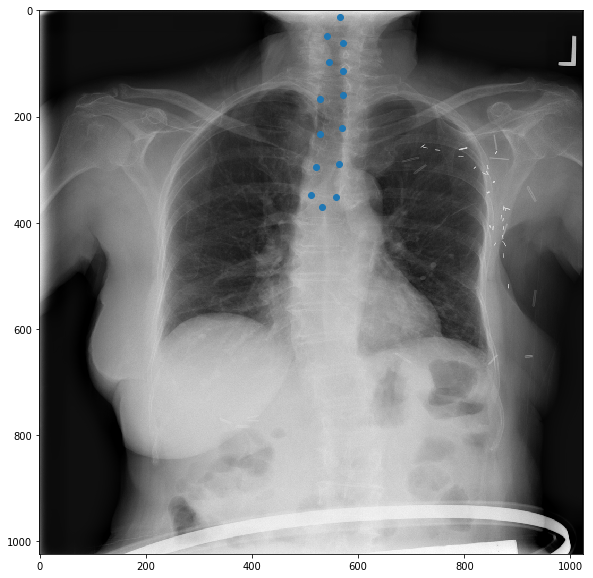

In [15]:
clavicle_r_coordinates = json_file.read_points('trachea')
x = []
y = []

for i in clavicle_r_coordinates:
    x.append(i[0])
    y.append(i[1])
    
plt.figure(figsize=(10,10))
plt.plot(x, y,'o')
plt.imshow(test_img, cmap='gray')

In [6]:
x_down_new, y_down_new, x_up_new, y_up_new = json_file.get_clavicle_r_coordinates()

clavicle_r's coordinates


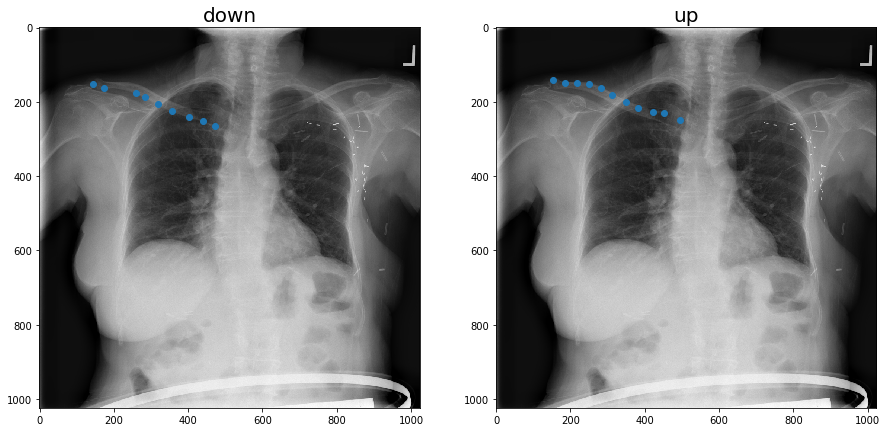

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('down', fontsize=20)
plt.plot(x_down_new, y_down_new,'o')
plt.imshow(test_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('up', fontsize=20)
plt.plot(x_up_new, y_up_new,'o')
plt.imshow(test_img, cmap='gray')

In [8]:
largrange_down         = lambda x: lagrange(x, x_down_new, y_down_new)
largrange_up           = lambda x: lagrange(x, x_up_new, y_up_new)
largrange_up_plus_down = lambda x: (lagrange(x, x_up_new, y_up_new)+lagrange(x, x_down_new, y_down_new))/2

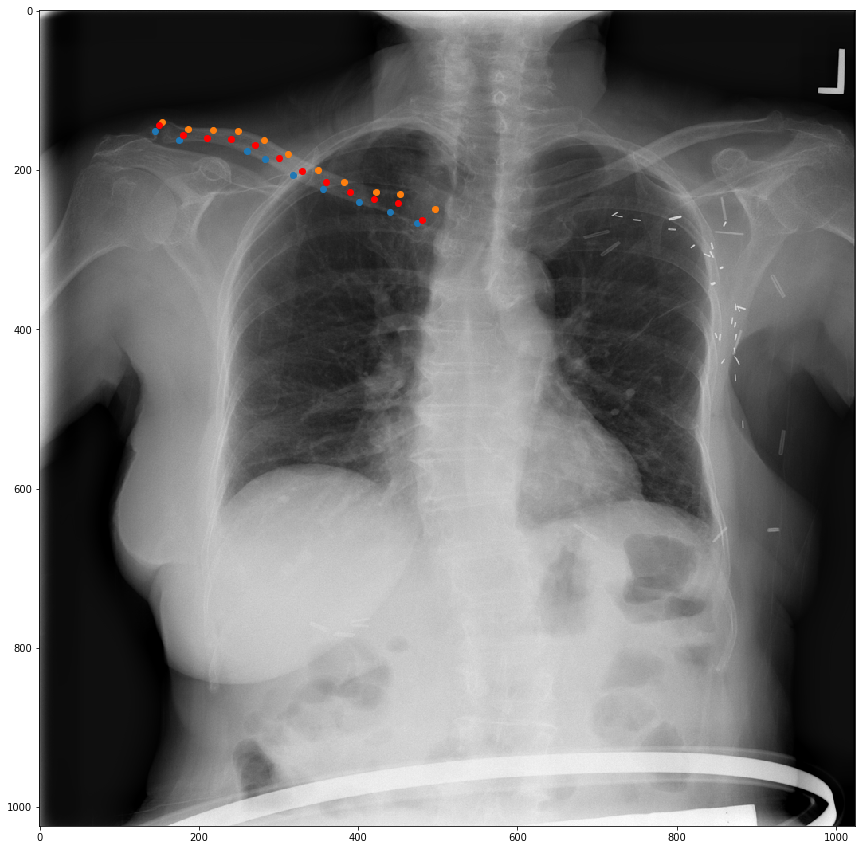

In [9]:
plt.figure(figsize=(15,15))
plt.plot(x_down_new, y_down_new,'o')
plt.plot(x_up_new, y_up_new,'o')

for i in range(12):
    number = 150+i*30
    plt.plot(number, largrange_up_plus_down(number),'o', color='r')

plt.imshow(test_img, cmap='gray')